<center><h1><font color='red'> Guide 5 |  Basic ML Tools </font></h1></center>

In this guide, you will learn how to use basic machine learning tools to analyze data.

## Objectives
* Supervised Models
  - SVM
  - Simple Neural Network Classifier
* Unsupervised Models
  - Dimensionality Reduction: PCA, tSNE
  - Clustering methods: KMeans, DBSCAN

## Table of Contents:
0. Exploring the Iris Dataset
0. Supervised Machine Learning
1. Unsupervised Machine Learning

In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
from sklearn.datasets import load_iris
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas
import seaborn as sns
import pandas as pd

## 0. Exploring the Iris Dataset

One of the best ways to learn how to use machine learning tools to analyze data is to see them in action. For this reason, today, we're going to be playing around with the famous iris dataset. This dataset is about flowers. For each flower, it gives us four features (this is just a fancy word for an attribute) and its classification:  Iris Setosa, Iris Versicolour, or Iris Virginica. Now, since our primary goal for today is not to gain a deep understanding for the structure of a flower, it is not that important for us to understand what these features actually mean. It will suffice to know that they are measurements for different parts of the flower, and from them, we should be able to classify the flower with some amount of accuracy. In the real world, however, it is always a good idea to have a solid understanding of your data, as this will help you think critically about how to best analyze it.  

In [3]:
# load iris dataset into dataframe
data = load_iris()
df_iris = pd.DataFrame(data.data, columns=data.feature_names)
df_iris['target'] = data.target

In the dataframe ```df_iris``` below, we can see that there are four features (the first four columns) and a target (the last column). This target corresponds to the flower's classification, with 0 corresponding to one species, 1 corresponding to another, and so on. It is important that our target class is numerical instead of the name of the species, as this is required by many machine learning models.



In [4]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


After taking a quick glance at our dataframe, it is always a good idea to begin to get a sense of what our data looks like. After all, if we want to create a machine learning model that classifies a flower based on its features, it might be useful to see how these features are different for different flowers. Today, we will not do a lot with this information. In the future, however, insights that you gleam from exploring your data can help you create new features or refine your old ones, which will ultimately make your model more accurate.

Be wary of using ```sns.pairplot()``` like we do below, however. It may be very conventient in this case, but for large datasets it can be overwhelming and take a long time to run!

<Figure size 360x360 with 0 Axes>

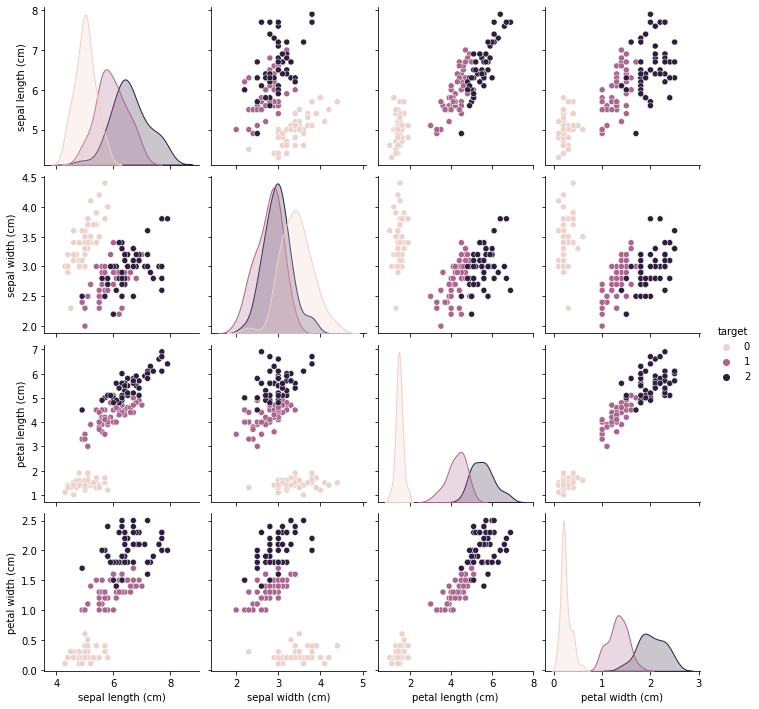

In [5]:
plt.figure(figsize=(5,5))
sns.pairplot(df_iris, hue='target')
plt.show()

Just by looking at these graphs, do you notice any differences between the different species of flowers? 

Now, let's get the computer to find, quantify and use these observations to predict which flower we are looking at based on its features. Onto machine learning!

## 1. Supervised

Before we dive into the specifics, I think it's important to get an  overarching view of what a supervised machine learning model is and how we build it.

**What is supervised learning?**

Supervised learning is the process by which a computer algorithm  learns a function that takes in data (your features) as an input and spits out a classification (also often called a label) as an output. This learning takes place by way of iteratively improving the function based on example data-label pairs. The beauty of this is that we don't need to explicitly tell the computer how to get from input to output or what to look for in the data -- it figures it our for us! In general, we consider there to be two major categories of supervised learning: classification and regression. Today, we will only be working with classification, but if you are interested, I would highly recommend looking into both. They are super cool! A classification model will take features as input (like the information about the structure of the flowers that we have in the iris dataset) and output a label (in our case, the species of the flower).

**Why is it useful?**

It lets us make accurate classifications based on complex data. Think facial recognition, Siri, disease diagnoses, and, wait for it, classifying animal behavior!

**How do we build a supervised machine learning model?**

After we have our features and our labels, there are five main steps to building a machine learning classifier. (There are sometimes more, but for simplicity's sake, let's stick with this for now.)

1. First, we must separate the features from the targets. We have to separate them because we are trying to create a model that uses the features to predict the target!

2. Then, we must split both these groups even further -- into training data and testing data. As its name suggests, the training data will be used to train the model, and the testing data will be used to test its accuracy. It is very important that these two groups are different, as we are not interested in building a model that only works on, for instance, the 150 flowers that we have in our dataset. Instead, we want to make a model that works, theoretically, on all flowers of these three species. In other words, we want to be able to test to see if our model generalizes well to data that it has never seen.

3. Third, we must preprocess the data. In essence, preprocessing cleans up our data and gets rid of variations that we want our model to ignore (for instance, we don't want our model to treat an animal's posture differently when it is in different parts of the screen, so we translate the points, as we saw in guide 3). This helps the model find the connections that we want it to, ensuring that it turns out to be as accurate as it can be. We will not go into a lot of depth for this step (mostly because there are many different techniques that are relevant in many different situations), but it is extemely important in machine learning. I would highly suggest looking into it more if you are interested! For those who are, here is a brief [overview](https://towardsdatascience.com/introduction-to-data-preprocessing-in-machine-learning-a9fa83a5dc9d) of a couple different techniques that are commonly used. 

4. Next, we must give the model our training data and run it. Depending on the algorithm we selected, the model will "learn" how to get from the input to the output in different ways.

5. Lastly, we must test our model. We will achieve this by analyzing its accuracy on our testing data.


As discussed, the first step to building our model is separating the features and the labels. To do this, we will create two numpy arrays ```X``` and ```y```.  ```X``` will be a 2D array containing the features, and ```y``` will be a 1D array containing the labels.

In [6]:
X = df_iris.iloc[:,:4].to_numpy()
y = df_iris.iloc[:,4].to_numpy()

Now, we can move onto the second step: splitting up the training and testing data. Take a look at the shape of the arrays as well as the graphs below; this will give you a better sense of what is going on.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
print(f"X Shape: {X.shape}")
print(f"y Shape: {y.shape}")

print(f"X_train Shape: {X_train.shape}")
print(f"X_test Shape: {X_test.shape}")

X Shape: (150, 4)
y Shape: (150,)
X_train Shape: (100, 4)
X_test Shape: (50, 4)


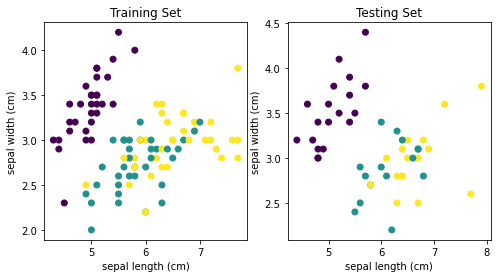

In [8]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].scatter(X_train[:,0], X_train[:,1], c=y_train)
ax[0].set_xlabel("sepal length (cm)"); ax[0].set_ylabel("sepal width (cm)"); ax[0].set_title("Training Set")

ax[1].scatter(X_test[:,0], X_test[:,1], c=y_test)
ax[1].set_xlabel("sepal length (cm)"); ax[1].set_ylabel("sepal width (cm)"); ax[1].set_title("Testing Set")
plt.show()

Next, we must preprocess the data. As I mentioned earlier, there are many different techniques that we use in different situations to achieve this goal, including but not limited to: removing/replacing NaN (empty) values in data, scaling data, and reducing the dimensionality (ie the number of features) in our data. Today, our objective is just to introduce you to the topic of preprocessing. Thus, here, we will only cover scaling (and later in the guide when we encounter unsupervised machine learning models, we will go more into the details and intuition behind dimensionality reduction). However, keep in mind that when you are analyzing data of your own, it will be important to think about what other types of preprocessing you might need to do to get the most out of your model.

**Why do we scale our data?**

A key step for many machine learning models is to plot our data in n-dimensional space, with n being the number of features that our data contains. For instance, for the iris dataset, we have four features, so our points would be plotted in 4D space, with each axis corresponding to one feature. Scaling is important because many models use the euclidian distance between points to help make decisions about classification. If we do not scale our data, features with larger ranges (ie 0 to 10,000 vs. 0 to 1) will affect these distances more than those with smaller ranges, thereby having an unduly large affect on classification. To prevent this, we scale all of our features so that they exist within the same range.

**How do we scale our data?**

Below, I'll show you one possibility: ```MinMaxScaler```. There are other types of scalers too -- if you are curious to learn about more, here is an interesting scikit learn [guide](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html)!


In [9]:
from sklearn.preprocessing import MinMaxScaler

# create an instance of MinMaxScaler
scaler = MinMaxScaler()

# fit the scaler to our training data, then scale our training data
scaled_X_train = scaler.fit_transform(X_train)

# scale our test data based on the scaling model fitted to our training data
scaled_X_test = scaler.transform(X_test)

In [10]:
# check out what happened!
print(f"X_train range:        {X_train.min()} to {X_train.max()}")
print(f"scaled_X_train range: {scaled_X_train.min()} to {scaled_X_train.max()}")

X_train range:        0.1 to 7.7
scaled_X_train range: 0.0 to 1.0


In [11]:
# why is scaled_X_test's range not exactly 0 to 1?
print(f"scaled_X_train range: {scaled_X_test.min()} to {scaled_X_test.max()}")

scaled_X_train range: -0.017857142857142877 to 1.0909090909090908


```scaled_X_test```'s range was not exactly 0 to 1 because we fit ```MinMaxScaler``` to our training data and applied it to our test data. This begs the question: if we wanted to scale our data so that its range was between 0 and 1, why did we not fit ```MinMaxScaler``` to our whole dataset so that both the training and test data were between 0 and 1?


The reason? Data leakage.


The bane of data scientists will forever be data leakage, a phenomenon that causes us to overestimate the accuracy of our model when we are finished building it. Data leakage can be caused in many ways, but one of the most common is when we accidentally let information from our test data *leak* into our training data.


Remember, after we build our model, we run it on our test data because this tells us how well our model generalizes (ie how well it works on data it has never encountered before). However, if during preprocessing, information from our test data *leaked* into our training data, our model will, in a way, have encountered the test data before. This will likely cause our model to be more accurate on our test data than it would be on real-world data that it has truly never seen before, causing us to overestimate our model's real-world accuracy.


With this in mind, why do you think it was so important that we fit ```MinMaxScaler``` only to our training data, rather than to the whole dataset?



#### 1.0 SVM: Support Vector Machine


Now that we've prepared our data, let's use it to build a model that predicts the species of our flowers based on their attributes! A support vector machine is a specific type of supervised machine learning model. Since we're just trying to get a sense of how to apply this model, I don't want to dive into the math here. If you are curious, though, feel free to check out this quick [video](https://www.youtube.com/watch?v=_YPScrckx28&t=133s) about the intuition behind it! (For those who do, why do you think scaling was such an important preprocessing step for this model?) Scikit learn has also put together a pretty detailed [guide](https://scikit-learn.org/stable/modules/svm.html) to the different SVMs they support, along with the links to their documentation.

In [12]:
from sklearn import svm

# create an instance of the support vector classifier
model = svm.SVC(kernel='linear', C=1.0)

# train the model on the training data
model.fit(scaled_X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
# use the trained model to predict the labels for the test data
y_predict = model.predict(scaled_X_test)

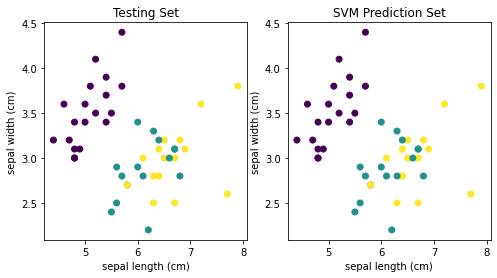

In [14]:
# visualize the actual labels and the predicted labels
fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].scatter(X_test[:,0], X_test[:,1], c=y_test)
ax[0].set_xlabel("sepal length (cm)"); ax[0].set_ylabel("sepal width (cm)"); ax[0].set_title("Testing Set")

ax[1].scatter(X_test[:,0], X_test[:,1], c=y_predict)
ax[1].set_xlabel("sepal length (cm)"); ax[1].set_ylabel("sepal width (cm)"); ax[1].set_title("SVM Prediction Set")
plt.show()

In [15]:
# determine how accurate our model is
print("TEST:")
print(y_test)
print("PREDICTION:")
print(y_predict)
num_correct = len(np.where(y_test-y_predict == 0)[0])
print(f"Accuracy: {100*num_correct/len(y_test)}%")

TEST:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]
PREDICTION:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]
Accuracy: 98.0%


Pretty neat, right?!

#### 1.1 Neural Network: Multilayer Perceptron

Now, we will try the exact same thing with a different model: a neural network classifier. This type of machine learning model is based on our understanding of how the brain works, which is pretty cool! Here is an excellent [video](https://www.youtube.com/watch?v=aircAruvnKk) on the topic if you're curious to learn more, along with scikit learn's [guide](https://scikit-learn.org/stable/modules/neural_networks_supervised.html).

In [16]:
from sklearn.neural_network import MLPClassifier

# create an instance of MLPClassifier (Multi-Layer Perceptron Classifier)
NN_model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(10, 5), random_state=1)

# train the model on the training data
NN_model.fit(scaled_X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [17]:
# use the trained model to predict the labels for the test data
y_NN_predict = NN_model.predict(scaled_X_test)

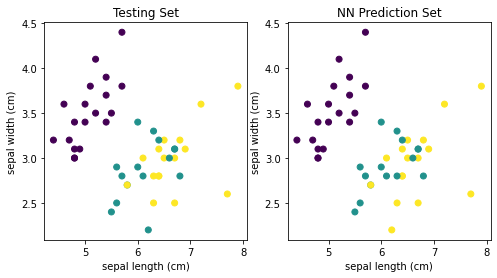

In [18]:
# visualize the actual labels and the predicted labels
fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].scatter(X_test[:,0], X_test[:,1], c=y_test)
ax[0].set_xlabel("sepal length (cm)"); ax[0].set_ylabel("sepal width (cm)"); ax[0].set_title("Testing Set")

ax[1].scatter(X_test[:,0], X_test[:,1], c=y_NN_predict)
ax[1].set_xlabel("sepal length (cm)"); ax[1].set_ylabel("sepal width (cm)"); ax[1].set_title("NN Prediction Set")
plt.show()

In [19]:
# determine how accurate our model is
print("TEST:")
print(y_test)
print("PREDICTION:")
print(y_NN_predict)
num_correct = len(np.where(y_test-y_NN_predict == 0)[0])
print(f"Accuracy: {100*num_correct/len(y_test)}%")

TEST:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]
PREDICTION:
[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]
Accuracy: 96.0%


Also pretty neat, right?! Please keep in mind that just because the SVC was more accurate than the neural network in this example does not mean that it will always be this way.

## 2. Unsupervised

**What is unsupervised learning?**

While supervised models attempt to find the connections between features and labels in order to place data into previously determined categories, unsupervised models find structures in unlabeled data. Sometimes, this takes the form of deriving the categories themselves. In other words, we do not give these types of models features and labels. Instead, we only give them features, and based on these features the model will find patterns in the data and then use them to create groups of similar data. Other times, it means finding patterns in our data that allow us to reduce the number of features (ie its dimensionality) without losing important information.

**Why is it useful?**

Given that there is a broad range of the functions that unsupervised models perform, there are many different cases in which they would be useful. We have mentioned two main functionalities thus far: categorizing unlabeled data and reducing dimensionality. 


1.   Categorizing unlabeled data (commonly known as clustering)

Usually, this type of model is used when we do not know the categories for the data. For instance, say we are analyzing a video of an ant. We may not know what behaviors the ant might perform to begin with, but by using an unsupervised machine learning model on postural and temporal data, we can derive the different types of behaviors that the ant showed through the video. This is nice because it allows us to detect subtle changes in behavior that we may not have noticed otherwise and because it eliminates some human bias by defining behaviors based purely on their quantitative attributes rather than what they look like to us.

2.   Reducing the dimensionality of data

Although this will not pose much use to us today since our data only contains three features, dimensionality reduction is often a key component of data analysis for supervised models and other unsupervised models (like clustering). It allows us to reduce the number of features that we have while still keeping all of the important information. This cleans up our data -- it helps to remove redunant features, reduce noise, decrease computational time, and for some models, it creates a 2D embedding space in which we can visualize clusters of similar data.

**How did we implement it?**

Let me show you! We will begin with dimesionality reduction below.


### 2.0 Dimensionality Reduction

Dimensionality reduction tools are unsupervised machine learning models that reduce the dimensionality (ie the number of features) in your data, while keeping the important information. This is useful for many different reasons, including decreasing noise and computational time, removing redudant features, and/or providing a 2D embedding space in which we can visualize clusters of similar data. 

#### 2.0.0 PCA

PCA, or more pedantically know as Principal Component Analysis, is a popularly used unsupervised machine learning tool that reduces the dimensionality (ie the number of features) of your data in a way that reduces your data's noise while maintaing its variance. PCA is quite helpful when working with high dimensionality data, as it can both reduce computational time and make it "easier" for machine learning models to find connections in data. For this reason, PCA is an excellent preprocessing technique for machine learning models (both supervised and unsupervised). Like always, here is scikit learn's [guide](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [20]:
from sklearn.decomposition import PCA

# create an instance of PCA that will reduce the dimensionality of our data to 2
pca_model = PCA(n_components=2)

# fit the model to our data and transform it
X_PCA = pca_model.fit_transform(X)

In [21]:
# Notice how the dimensionality of our features array has decreased!
print(X.shape)
print(X_PCA.shape)

(150, 4)
(150, 2)


In [22]:
# finds total variance of dataset before PCA dimensionality reduction
total_variance = 0

for feature in range(X.shape[1]):
  total_variance += np.var(X[:,feature])

# calculates the percent variance that was conserved
new_total_variance = 0

for feature in range(X_PCA.shape[1]):
  new_total_variance += np.var(X_PCA[:,feature])

print(f"{(new_total_variance/total_variance) * 100}% of the variance was conserved")

97.76852063187953% of the variance was conserved


We only lost ~2% of our data's variance, and we cut the number of features in half!

#### 2.0.1 Manifold Learning

Manifold learning models encapsulate a category of unsupervised machine learning models that reduce the dimensionality of data in a way that makes it easy to visual it in a 2D embedding space.  These models tend to be ideal precursors for the clustering algorithms that we will show you next, as they create clear groups that clustering tools can then identify. They are not typically used as a preprocessing tool for supervised machine learning models.

##### t-SNE

tSNE, or t-distributed Stochastic Neighbor Embedding, is a type of manifold learning model. As we discussed, it reduces the dimensionality of data in a way that allows you to visualize similar datapoints as clusters (groups of datapoints), typically on a two dimensional map. This makes it an ideal precursor to the clustering algorithms that we will soon introduce. If you are curious to learn more, please check out sklearn's [guide](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) and this interesting [article](https://towardsdatascience.com/why-you-are-using-t-sne-wrong-502412aab0c0) about some common mistakes data scientists make when utilizing tSNE.

In [33]:
from sklearn.manifold import TSNE

# create an instance of tsne that will reduce our data to 2 dimensions
tsne_model = TSNE(n_components=2, random_state=200)

# fits the model to our data, and then transforms our data using the model
X_tsne = tsne_model.fit_transform(X) # what is different here?!

# # Notice how the dimensionality of our features array has decreased!
print(X.shape)
print(X_tsne.shape)

(150, 4)
(150, 2)


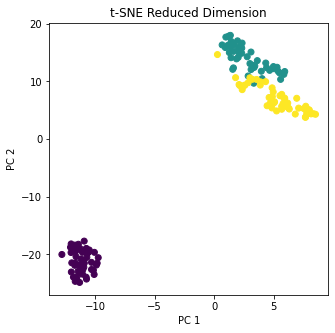

In [34]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y)
plt.xlabel("PC 1"); plt.ylabel("PC 2"); plt.title("t-SNE Reduced Dimension")
plt.show()

### 2.1 Clustering

Clustering techniques are unsupervised machine learning models that use various mathematical algorithms to define groups of data with similar characteristics. Often, these models are implemented after manifold learning dimensionality reduction methods like t-SNE so that we can identify and label the clusters that they created.

#### 2.1.0 K-Means

K-Means clustering is one of the most commonly used clustering algorithms. You specify the number of clusters you want to label in your data, and k-means will create that label that many clusters of similar datapoints. As a general rule, K-Means clustering works best after we have reduced the dimensionality of our data using tSNE or some other manifold learning technique. However, in this case, since we began with such low dimensionality data (only 4 features), we will proceed without this step. If you are curious about the mathematics behind it, I would highly recommend checking out this [guide](https://scikit-learn.org/stable/modules/clustering.html#k-means).

In [35]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3, random_state=3)
kmeans_model.fit(X_tsne) # notice that we are fitting this to the tsne reduced dimensionality data

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=3, tol=0.0001, verbose=0)

In [36]:
y_kmeans_pred = kmeans_model.labels_

Remember, typically, we will not have test data that we can use to check the accuracy of our labels when we use unsupervised clustering algorithms. Thus, in the real world, you will instead have to tell how well any given clustering method works by plotting your points and seeing if the colors tend to match up with the clumps of points on the graph. Since we do have test data in this case, though, we might as well check to see how K-Means clustering did!

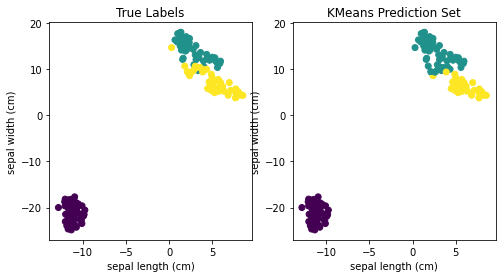

In [37]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].scatter(X_tsne[:,0], X_tsne[:,1], c=y)
ax[0].set_xlabel("sepal length (cm)"); ax[0].set_ylabel("sepal width (cm)"); ax[0].set_title("True Labels")

ax[1].scatter(X_tsne[:,0], X_tsne[:,1], c=y_kmeans_pred)
ax[1].set_xlabel("sepal length (cm)"); ax[1].set_ylabel("sepal width (cm)"); ax[1].set_title("KMeans Prediction Set")
plt.show()

In [38]:
print("TEST:")
print(y)
print("PREDICTION:")
print(y_kmeans_pred)
num_correct = len(np.where(y-y_kmeans_pred == 0)[0])
print(f"Accuracy: {100*num_correct/len(y)}%")

TEST:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
PREDICTION:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 2 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 2 2
 2 1]
Accuracy: 92.0%


#### 2.1.1 DBSCAN

DBSCAN is another commonly used clustering technique. In a practice sense, there are two main distinctions between it and K-Means clustering. Firstly, DBSCAN will "decide" how many clusters to create based on its input parameters -- you don't need to specify how many you believe there should be like you do for K-Means clustering. This is both a blessing and a curse: you don't need to have a sense of how many clusters exist in your data beforehand, but you do have to choose the correct parameters. Secondly, unlike K-Means clustering, DBSCAN tends works on data whose clusters are not convex shaped (like a polygon). If you are interested in learning about how DBSCAN works and about the intuition behind choosing the correct parameter values, please check out the sklearn [guide](https://scikit-learn.org/stable/modules/clustering.html#dbscan)!

In [30]:
from sklearn.cluster import DBSCAN
dbscan_model = DBSCAN(eps=1.3, min_samples=5) # play around with these parameters a bit. how does this change the result?
y_dbscan_pred = dbscan_model.fit_predict(X_tsne)

Again, typically, we won't be able to check the accuracy of our labels when we use unsupervised clustering algorithms since we usually have no baseline to compare them to. Since we do in this case, though, we might as well check to see how DBSCAN did!

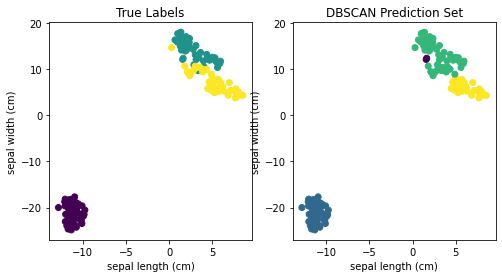

In [31]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].scatter(X_tsne[:,0], X_tsne[:,1], c=y)
ax[0].set_xlabel("sepal length (cm)"); ax[0].set_ylabel("sepal width (cm)"); ax[0].set_title("True Labels")

ax[1].scatter(X_tsne[:,0], X_tsne[:,1], c=y_dbscan_pred)
ax[1].set_xlabel("sepal length (cm)"); ax[1].set_ylabel("sepal width (cm)"); ax[1].set_title("DBSCAN Prediction Set")
plt.show()

In [32]:
print("TEST:")
print(y)
print("PREDICTION:")
print(y_dbscan_pred)
num_correct = len(np.where(y-y_dbscan_pred == 0)[0])
print(f"Accuracy: {100*num_correct/len(y)}%")

TEST:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
PREDICTION:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  2  1  2  2  2  2  1  2  2  2  2  2  2  1  1  2  2  2  2  1
  2  1  2  1  2  2  1  1  2  2  2  2  2  1  1  2  2  2  1  2  2  2  1  2
  2  2  1  2  2  1]
Accuracy: 88.66666666666667%


<hr>
<strong>Created: </strong> August 15, 2020

<strong>Author: </strong> Dong Hur, Souvik Mandal, Jonah Brenner

<strong>Revised: </strong> October 19, 2021